In [8]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [10]:
# reading data
data = pd.read_csv("E:\\! Term 2\\ECM\\session3- DES TES\\seriesseasonal.csv")

In [11]:
data.head(3)

,qtr,t,y
0,10 Q1,1,10
1,10 Q2,2,14
2,10 Q3,3,8


In [13]:
# train-test split(splitting with a fixed data split as it cannot be random in time series)
train = data.iloc[0:10]
test = data.iloc[10:]
y = test.copy()

In [26]:
# Fitting model with Additive trend
model_a = ExponentialSmoothing(np.asarray(train['y']),
                            seasonal_periods=4, trend='add',
                            seasonal='add')

In [35]:
tes_a = model_a.fit(smoothing_level=0.015532, smoothing_slope=1, smoothing_seasonal=0.23088, optimized=False)

In [41]:
# Predicted and stored into dataframe in column 'pred_a'
y['pred_a'] = tes_a.forecast(len(test))
y 

,qtr,t,y,pred_a
10,12 Q3,11,18,22.641838
11,12 Q4,12,40,41.252229
12,13 Q1,13,28,26.612226
13,13 Q2,14,40,33.662740
14,13 Q3,15,25,27.841380
15,13 Q4,16,65,46.451771


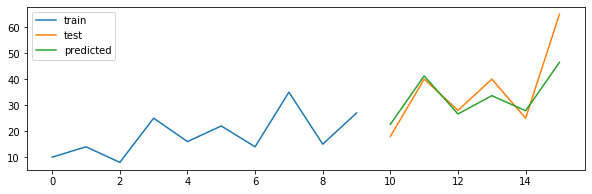

In [37]:
# Plotting predicted values of additive trend
plt.figure(figsize=(10,3))
plt.plot(train['y'], label='train')
plt.plot(test['y'], label='test')
plt.plot(y['pred_a'], label='predicted')
plt.legend(loc='best')
plt.show()

In [42]:
# Fitting a model with Multiplicative trend
model_m = ExponentialSmoothing(np.asarray(train['y']),
                            seasonal_periods=4, trend='add',
                            seasonal='mul')

In [29]:
tes_m = model_m.fit(smoothing_level=0.5, smoothing_slope=0.5, smoothing_seasonal=0.5, optimized=False)

In [43]:
# Predicted and stored into dataframe in column 'pred_a'
y['pred_m'] = tes_m.forecast(len(test))
y

,qtr,t,y,pred_a,pred_m
10,12 Q3,11,18,22.641838,13.339897
11,12 Q4,12,40,41.252229,36.937301
12,13 Q1,13,28,26.612226,19.057903
13,13 Q2,14,40,33.662740,25.980640
14,13 Q3,15,25,27.841380,14.839565
15,13 Q4,16,65,46.451771,40.976269


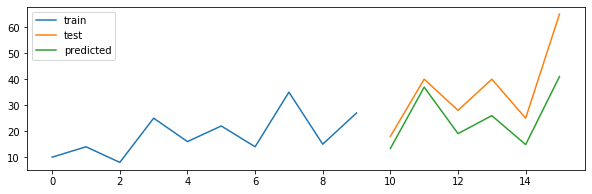

In [44]:
# Plotting predicted values of multiplicative trend
plt.figure(figsize=(10,3))
plt.plot(train['y'], label='train')
plt.plot(test['y'], label='test')
plt.plot(y['pred_m'], label='predicted')
plt.legend(loc='best')
plt.show()